In [2]:
import tensorflow as tf

In [5]:
hello_const = tf.constant("Hello!")

In [7]:
type(hello_const)

tensorflow.python.framework.ops.Tensor

In [9]:
num = tf.constant(10)

In [10]:
sess = tf.Session()

In [11]:
sess.run(hello_const)

b'Hello!'

In [12]:
sess.run(num)

10

In [13]:
type(sess.run(num))

numpy.int32

In [14]:
type(sess.run(hello_const))

bytes

## tensor flow operations

In [25]:
x = tf.constant(2)
y = tf.constant(3)
x

<tf.Tensor 'Const_6:0' shape=() dtype=int32>

In [21]:
with tf.Session() as sess:
    print('Operations')
    print('Additions: ', sess.run(x+y))
    print('Subtraction: ', sess.run(x-y))
    print('Multiplication: ', sess.run(x*y))
    print('Division: ', sess.run(x/y))

Operations
Additions:  5
Subtraction:  -1
Multiplication:  6
Division:  0.666666666667


In [22]:
x = tf.placeholder(tf.int32)

In [23]:
y = tf.placeholder(tf.int32)

In [24]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [26]:
add = tf.add(x,y)

In [28]:
subtraction = tf.subtract(x,y)

In [32]:
multiply = tf.multiply(x,y)
div = tf.div(x,y)

In [36]:
d = {x:20, y:30}
with tf.Session() as sess:
    print('Operations with placeholders')
    print('Addition: ', sess.run(add, feed_dict=d))
    print('Multiplication: ', sess.run(multiply, feed_dict=d))
    print('Substraction: ', sess.run(subtraction, feed_dict=d))
    print('Division: ', sess.run(div, feed_dict=d))

Operations with placeholders
Addition:  50
Multiplication:  600
Substraction:  -10
Division:  0


In [37]:
import numpy as np

In [43]:
a = np.array([[5.0,5.0]])
b = np.array([[4.6],[.5]])

In [44]:
a.shape

(1, 2)

In [45]:
b.shape

(2, 1)

In [46]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [48]:
matrix_mul = tf.matmul(mat1,mat2)

In [49]:
with tf.Session() as sess:
    print("Matrix multiplication with constants", sess.run(matrix_mul))

Matrix multiplication with constants [[ 25.5]]


## MNIST

In [50]:
from tensorflow.examples.tutorials.mnist import input_data

In [51]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [52]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [54]:
type(mnist.train.images)

numpy.ndarray

In [93]:
mnist.train.images.shape

(55000, 784)

In [114]:
print(mnist.train.images[188].shape)

(784,)


In [64]:
pic = mnist.train.images[188].reshape(28,28)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

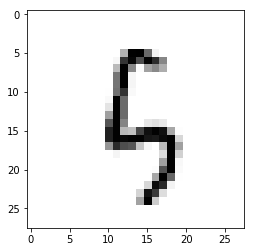

In [66]:
plt.imshow(pic, cmap='Greys')

In [68]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [71]:
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784

In [72]:
n_hidden_1 = 256
n_hidden_2 = 256

In [73]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for data inputs
    weights: Dictionary of weights
    biases: Dictionary of weights
    '''
    
    #First hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    
    output_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return output_layer

In [78]:
weights={
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [118]:
weights['out']

<tf.Variable 'Variable_4:0' shape=(256, 10) dtype=float32_ref>

In [83]:
biases={
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [86]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [89]:
pred = multilayer_perceptron(x, weights, biases)

In [119]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Train the model

In [153]:
t = mnist.train.next_batch(batch_size)

In [154]:
X_samp,y_samp = t

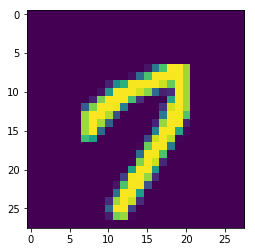

In [155]:

plt.imshow(X_samp[1].reshape(28,28))

In [162]:
sess = tf.Session()

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

FailedPreconditionError: Attempting to use uninitialized value Variable_2
	 [[Node: Variable_2/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_2"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_2)]]

Caused by op 'Variable_2/read', defined at:
  File "/home/casper/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/casper/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/casper/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/casper/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/casper/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/casper/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-78-02996358aa29>", line 2, in <module>
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 197, in __init__
    expected_shape=expected_shape)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 316, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1338, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/casper/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_2
	 [[Node: Variable_2/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_2"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_2)]]
